In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, classification_report
)

print("Libraries loaded successfully.")


Libraries loaded successfully.


In [7]:
df = pd.read_csv("student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [8]:
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(" ", "_")
              .str.replace("?", "")
)

df = df.rename(columns={"work/study_hours": "work_study_hours"})
df.head()

,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_,work_study_hours,financial_stress,family_history_of_mental_illness,depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [10]:
numeric_cols = [
    "age", "academic_pressure", "work_pressure", "cgpa",
    "study_satisfaction", "job_satisfaction",
    "work_study_hours", "financial_stress"
]

# Convert all numeric columns to numbers
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Now fill missing numeric values
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

categorical_cols = [
    "gender", "city", "profession", "sleep_duration",
    "dietary_habits", "degree",
    "have_you_ever_had_suicidal_thoughts_",
    "family_history_of_mental_illness"
]

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df = df.drop_duplicates()
df.head()


,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_,work_study_hours,financial_stress,family_history_of_mental_illness,depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [11]:
sleep_map = {
    "'less_than_5_hours'": 4,
    "'5-6_hours'": 5.5,
    "'7-8_hours'": 7.5,
    "'more_than_8_hours'": 9
}

df["sleep_hours"] = df["sleep_duration"].map(sleep_map).fillna(7)
df["risk_label"] = df["depression"].astype(int)
df["sleep_deficit"] = 8 - df["sleep_hours"]
df["stress_level"] = df["financial_stress"]
df["stress_study_ratio"] = df["stress_level"] / (df["work_study_hours"] + 1)
df["academic_score"] = df["cgpa"] * (1 + df["academic_pressure"] / 5.0)
df["suicidal_thoughts_flag"] = df["have_you_ever_had_suicidal_thoughts_"].map({"Yes": 1, "No": 0})

df[[
    "cgpa", "sleep_hours", "sleep_deficit",
    "stress_level", "stress_study_ratio",
    "academic_score", "risk_label"
]].head()


,cgpa,sleep_hours,sleep_deficit,stress_level,stress_study_ratio,academic_score,risk_label
0,8.97,7.0,1.0,1.0,0.25,17.940,1
1,5.90,7.0,1.0,2.0,0.50,8.260,0
2,7.03,7.0,1.0,1.0,0.10,11.248,0
3,5.59,7.0,1.0,5.0,1.00,8.944,1
4,8.13,7.0,1.0,1.0,0.50,14.634,0


In [12]:
feature_cols = [
    "cgpa", "sleep_hours", "work_study_hours", "academic_pressure",
    "work_pressure", "financial_stress", "study_satisfaction",
    "sleep_deficit", "stress_study_ratio", "academic_score",
    "suicidal_thoughts_flag"
]

X = df[feature_cols]
y = df["risk_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training shape:", X_train.shape)


Training shape: (22320, 11)


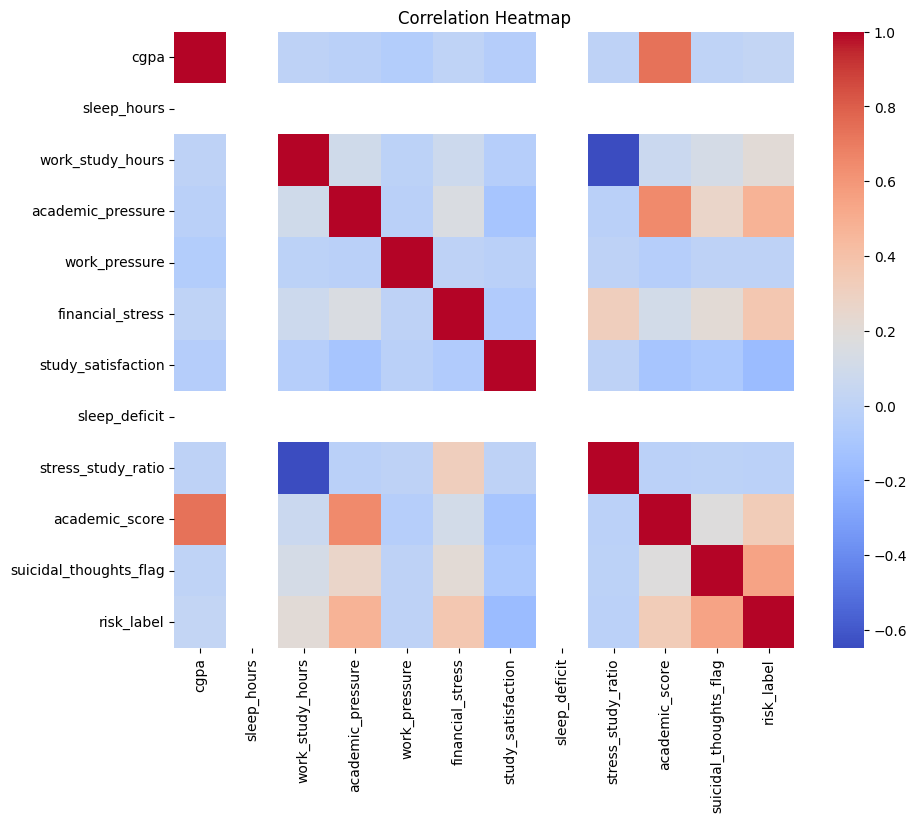

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[feature_cols + ["risk_label"]].corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


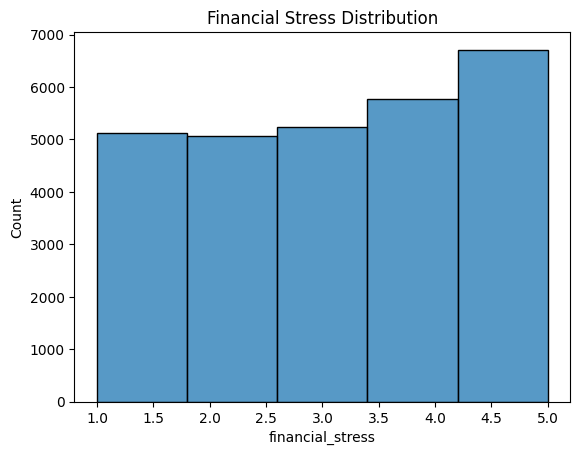

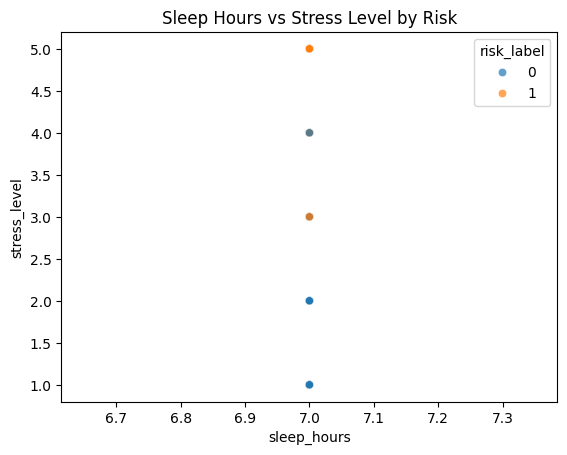

In [14]:
sns.histplot(df["financial_stress"], bins=5)
plt.title("Financial Stress Distribution")
plt.show()

sns.scatterplot(
    data=df, x="sleep_hours", y="stress_level",
    hue="risk_label", alpha=0.7
)
plt.title("Sleep Hours vs Stress Level by Risk")
plt.show()


In [15]:
conn = sqlite3.connect(":memory:")

df[["id", "gender", "age", "city"]].to_sql("demographics", conn, index=False)
df[["id", "cgpa", "academic_pressure", "study_satisfaction"]].to_sql("academics", conn, index=False)
df[[
    "id", "sleep_hours", "work_study_hours",
    "financial_stress", "suicidal_thoughts_flag"
]].to_sql("lifestyle", conn, index=False)
df[["id", "risk_label"]].to_sql("mental_health", conn, index=False)

query = """
SELECT gender, AVG(risk_label) AS avg_risk
FROM demographics
JOIN mental_health USING(id)
GROUP BY gender;
"""

pd.read_sql_query(query, conn)


,gender,avg_risk
0,Female,0.584507
1,Male,0.586287


In [16]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))


Accuracy: 0.8331840172012184
Precision: 0.8445886169271601
Recall: 0.8763769889840881
[[1786  527]
 [ 404 2864]]


In [17]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.7989607597204802
Precision: 0.8265368228849665
Recall: 0.8310893512851897
[[1743  570]
 [ 552 2716]]


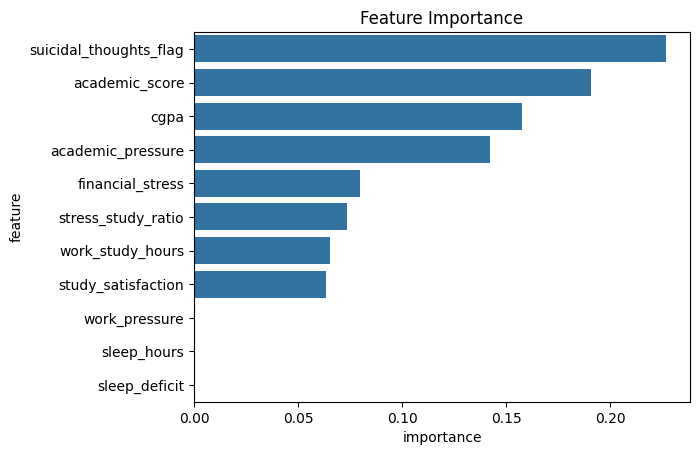

,feature,importance
10,suicidal_thoughts_flag,0.227037
9,academic_score,0.190912
0,cgpa,0.157774
3,academic_pressure,0.142243
5,financial_stress,0.079873
8,stress_study_ratio,0.073381
2,work_study_hours,0.065415
6,study_satisfaction,0.063356
4,work_pressure,0.000008
1,sleep_hours,0.000000


In [18]:
importances = rf.feature_importances_
feat_imp = pd.DataFrame({"feature": feature_cols, "importance": importances})
feat_imp = feat_imp.sort_values("importance", ascending=False)

sns.barplot(data=feat_imp, x="importance", y="feature")
plt.title("Feature Importance")
plt.show()

feat_imp


In [19]:
results = pd.DataFrame({
    "Model": ["Log_reg", "RandomForest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf)
    ]
})

results


,Model,Accuracy,Precision,Recall
0,Log_reg,0.833184,0.844589,0.876377
1,RandomForest,0.798961,0.826537,0.831089
